# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [274]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [533]:
df_hh_income = pd.read_csv('./data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('./data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('./data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('./data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('./data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [108]:
# print(df_hh_income.head())
# print(df_hh_income.info())
# print(df_hh_income.describe())
# print(df_hh_income.isna().any())

In [107]:
# print(df_pct_poverty.head())
# print(df_pct_poverty.info())
# print(df_pct_poverty.describe())
# print(df_pct_poverty.isna().any())

In [106]:
# print(df_pct_completed_hs.head())
# print(df_pct_completed_hs.info())
# print(df_pct_completed_hs.describe())
# print(df_pct_completed_hs.isna().any())

In [312]:
print(df_share_race_city.head())
print(df_share_race_city.info())
print(df_share_race_city.describe())
print(df_share_race_city.isna().any())

  Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  obje

In [313]:
# print(df_fatalities.head())
# print(df_fatalities.info())
# print(df_fatalities.describe())
# print(df_fatalities.isna().any())

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [534]:
# Replace NA values with 0, clean numbers and convert to numeric type

# df_hh_income  
df_hh_income = df_hh_income.fillna(0)
chars_to_replace = [',', '-', '+']

df_hh_income['Median Income'][df_hh_income['Median Income'] == '(X)'] = 0
df_hh_income['Median Income'][df_hh_income['Median Income'] == '-'] = 0
for char in chars_to_replace:
    df_hh_income['Median Income'] = df_hh_income['Median Income'].astype(str).str.replace(char, '')

df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'])

# df_pct_poverty
for char in chars_to_replace:
    df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(str).str.replace(char, '')
df_pct_poverty.poverty_rate[df_pct_poverty.poverty_rate == 'nan'] = 0
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

# df_pct_completed_hs
for char in chars_to_replace:
    df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(str).str.replace(char, '')
df_pct_completed_hs.percent_completed_hs[df_pct_completed_hs.percent_completed_hs == 'nan'] = 0
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

# df_share_race_city
shares = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
for char in chars_to_replace:
    for share in shares:
        df_share_race_city[share] = df_share_race_city[share].astype(str).str.replace(char, '')
        df_share_race_city[share][df_share_race_city[share] == 'nan'] = 0
        df_share_race_city[share][df_share_race_city[share] == '(X)'] = 0
        df_share_race_city[share] = pd.to_numeric(df_share_race_city[share])

# df_fatalities
df_fatalities = df_fatalities.fillna('Unknown')
df_fatalities.armed[df_fatalities.armed == 0] = 'unarmed'
df_fatalities.armed[df_fatalities.armed == '0'] = 'unarmed'

df_fatalities.race[df_fatalities.race == '0'] = 'Unknown'
df_fatalities.race[df_fatalities.race == 0] = 'Unknown'
df_fatalities.race[df_fatalities.race == 'O'] = 'Unknown'
df_fatalities.race[df_fatalities.race == 'W'] = 'White'
df_fatalities.race[df_fatalities.race == 'B'] = 'Black'
df_fatalities.race[df_fatalities.race == 'A'] = 'Asian'
df_fatalities.race[df_fatalities.race == 'H'] = 'Hispanic'
df_fatalities.race[df_fatalities.race == 'N'] = 'Native American'

df_fatalities.gender[df_fatalities.gender == 'M'] = 'Male'
df_fatalities.gender[df_fatalities.gender == 'F'] = 'Female'




C:\Users\joshu\AppData\Local\Temp\ipykernel_12340\3906596597.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\joshu\AppData\Local\Temp\ipykernel_12340\3906596597.py:16: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\joshu\AppData\Local\Temp\ipykernel_12340\3906596597.py:22: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\joshu\AppData\Local\Temp\ipykernel_12340\3906596597.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [167]:
poverty_rate = df_pct_poverty.groupby(['Geographic Area'], as_index=False).agg(Mean_Poverty_Rate=('poverty_rate', 'mean')).round(2)
# poverty_rate = poverty_rate.sort_values('Mean_Poverty_Rate', ascending=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=poverty_rate['Geographic Area'], 
                     y=poverty_rate.Mean_Poverty_Rate,
                     hovertemplate="<br>State=%{x}<br>Povery Rate=%{y}%<extra></extra>"))
fig.update_layout(legend_title_text = "Poverty Rate in each US State")
fig.update_xaxes(title_text="State")
fig.update_yaxes(title_text="Poverty Rate %", range=[0, 100]
)
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [214]:
avg_grad_rate = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg(Avg_HS_Rate = ('percent_completed_hs', 'mean')).reset_index().round(2)
# avg_grad_rate = avg_grad_rate.sort_values('Avg_HS_Rate', ascending=True)

In [169]:
fig = go.Figure()
fig.add_trace(go.Bar(x=avg_grad_rate['Geographic Area'], 
                     y=avg_grad_rate.Avg_HS_Rate,
                     hovertemplate="<br>State=%{x}<br>HS Grad Rate=%{y}%<extra></extra>"))
fig.update_layout(legend_title_text = "Poverty Rate in each US State")
fig.update_xaxes(title_text="State")
fig.update_yaxes(title_text="High School Graduation Rate %", range=[0, 100]
)
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [221]:
poverty_grad = poverty_rate
poverty_grad['Grad_Rate'] = avg_grad_rate['Avg_HS_Rate']

In [218]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=poverty_grad['Geographic Area'], 
                     y=poverty_grad.Mean_Poverty_Rate,
                     hovertemplate="<br>State=%{x}<br>Povery Rate=%{y}%<extra></extra>",
                     name='Poverty Rate',
                     line=dict(color='orangered', width=2)))
fig.add_trace(go.Scatter(x=poverty_grad['Geographic Area'], 
                     y=poverty_grad.Grad_Rate,
                     hovertemplate="<br>State=%{x}<br>HS Grad Rate=%{y}%<extra></extra>",
                     name='HS Graduation Rate',
                     line=dict(color='seagreen', width=2, dash='dot')))
fig.update_layout(legend_title_text = "Poverty Rate in each US State")
fig.update_xaxes(title_text="State")
fig.update_yaxes(title_text="% Rate", range=[0, 100])

fig.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

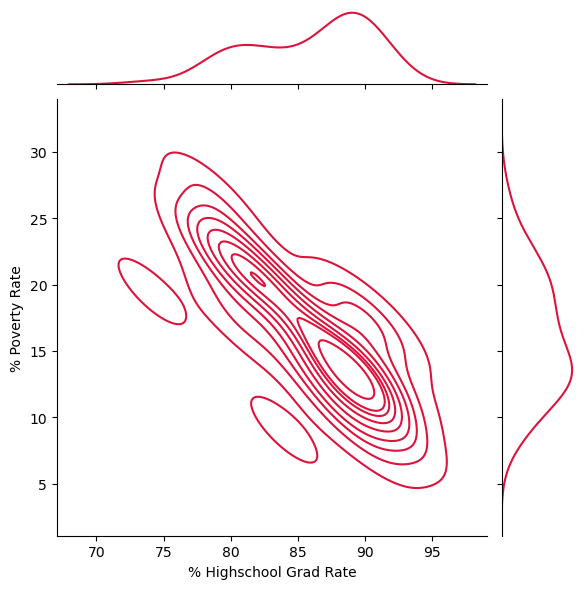

In [231]:
pov_grad_plot = sns.jointplot(data=poverty_grad,
    x='grad_rate',
    y='Mean_Poverty_Rate',
    color='crimson',
    kind='kde',
)
pov_grad_plot.set_axis_labels('% Highschool Grad Rate',
       '% Poverty Rate')

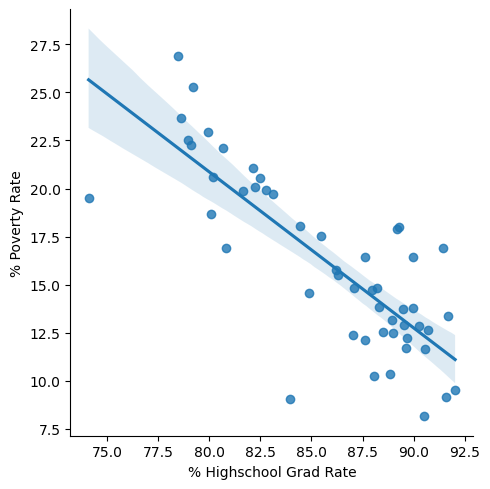

In [228]:
pov_grad_plot = sns.lmplot(data=poverty_grad,
    x='grad_rate',
    y='Mean_Poverty_Rate',
)
pov_grad_plot.set_axis_labels('% Highschool Grad Rate',
       '% Poverty Rate')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [701]:
shares = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
race_shares = df_share_race_city.groupby('Geographic area', as_index=False).mean()
race_shares

C:\Users\joshu\AppData\Local\Temp\ipykernel_12340\1477631529.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.26,0.56,45.48,1.38,2.13
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.54,2.68,1.72,5.54,29.51
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [302]:
fig = make_subplots(rows=1,
                    cols=len(shares), 
                    shared_xaxes=True,)
for pos in range(0, len(shares)):
    fig.add_trace(go.Bar(x=race_shares['Geographic area'], 
                        y=race_shares[shares[pos]],
                        hovertemplate="<br>State=%{x}<br>Population %=%{y}%<extra></extra>",
                        name=shares[pos]),
                        row=1,
                        col=pos+1)
fig.update_layout(legend_title_text = "Races", title='Racial Distribution of each US State', barmode='stack')
fig.update_xaxes(title_text="State")
fig.update_yaxes(title_text='% Population of Each Race', range=[0, 100])
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [324]:
deaths = df_fatalities.groupby('race', as_index=False).agg(Deaths=('race', 'count'))
deaths

,race,Deaths
0,Asian,39
1,Black,618
2,Hispanic,423
3,Native American,31
4,Unknown,223
5,White,1201


In [344]:
death_pie = px.pie(deaths,
    values='Deaths',
    names='race',
    color='race',
    hole=0.3,
    title='% of Police Deaths per Race',
    labels={'race': 'Race'})

death_pie.update_layout(margin=dict(l=00, r=1340, t=40, b=20),
                        legend_title_text='Race')
death_pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [349]:
gender_deaths = df_fatalities.groupby('gender', as_index=False).agg(Deaths=('gender', 'count'))
gender_deaths

,gender,Deaths
0,Female,107
1,Male,2428


In [368]:
gender_deaths_bar = go.Figure()
gender_deaths_bar.add_trace(go.Bar(x=gender_deaths.gender, 
                    y=gender_deaths.Deaths,
                    hovertemplate="<br>Gender=%{x}<br>Deaths=%{y}<extra></extra>",
                    marker_color=['steelblue','firebrick']))
gender_deaths_bar.update_layout(title_text = "Police Deaths by Gender",
                                width=500)
gender_deaths_bar.update_xaxes(title_text="Gender")
gender_deaths_bar.update_yaxes(title_text="Number of Police Deaths")
gender_deaths_bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [505]:
gender_MoD = df_fatalities
gender_MoD.age = gender_MoD.age.round(-1)
male_MoD = gender_MoD[gender_MoD.gender == 'Male']
female_MoD = gender_MoD[gender_MoD.gender == 'Female']

In [507]:
gender_MoD_box = go.Figure()

gender_MoD_box.add_trace(go.Box(x=male_MoD.manner_of_death,
                                y=male_MoD.age,
                                quartilemethod="linear",
                                name='Male'))

gender_MoD_box.add_trace(go.Box(x=female_MoD.manner_of_death,
                                y=female_MoD.age,
                                quartilemethod="linear",
                                name='Female'))

gender_MoD_box.update_layout(title_text = "Manner of Police Deaths by Gender",
                             legend_title_text='Gender',
                             boxmode='group')
gender_MoD_box.update_xaxes(title_text="Method of Death")
gender_MoD_box.update_yaxes(title_text="Number of Deaths")
gender_MoD_box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [551]:
armed_bar = go.Figure()

armed_bar.add_trace(go.Bar(x=df_fatalities.armed.value_counts().index, y=df_fatalities.armed.value_counts().values))
armed_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [619]:
age_killed = df_fatalities
avg_age = age_killed.age.mean().round(0)
age_killed.age[age_killed.age == 'Unknown'] = avg_age
age_killed = age_killed.fillna(avg_age)
age_killed.age[age_killed.age < 25] = 'Under 25'
age_killed.age[age_killed.age != 'Under 25'] = 'Over 25'

C:\Users\joshu\AppData\Local\Temp\ipykernel_12340\1437226905.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_12340\1437226905.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [621]:
age_pie = go.Figure()

age_pie.add_trace(go.Pie(labels=age_killed.age.value_counts().index, values=age_killed.age.value_counts().values))
age_pie.update_layout(
    title_text='Police Deaths by Age',
    legend_title_text='Age',
    autosize=False,
    width=1500,
    height=700,
    margin=dict(l=100, r=800, t=40, b=20)
)
age_pie.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [657]:
race_pie = go.Figure()

race_pie.add_trace(go.Pie(labels=df_fatalities.race.value_counts().index, values=df_fatalities.race.value_counts().values))
race_pie.update_layout(
    title_text='Police Deaths by Race',
    legend_title_text='Race',
    autosize=False,
    width=1500,
    height=500,
    margin=dict(l=100, r=900, t=40, b=20))
race_pie.update_traces(marker=dict(line=dict(color='#000000', width=1.5)),
                       textinfo='label+percent')
race_pie.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [658]:
mental_pie = go.Figure()

mental_pie.add_trace(go.Pie(labels=df_fatalities.signs_of_mental_illness.value_counts().index, values=df_fatalities.signs_of_mental_illness.value_counts().values))
mental_pie.update_layout(
    title_text='Mental Illness % of Police Death Victims',
    legend_title_text='Mental Illness (T/F)',
    autosize=False,
    width=1500,
    height=500,
    margin=dict(l=100, r=900, t=40, b=20))
mental_pie.update_traces(marker=dict(line=dict(color='#000000', width=1.5)),
                       textinfo='label+percent')
mental_pie.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [686]:
top_10_cities = df_fatalities.groupby('city', as_index=False).agg(city_count=('city', 'count')).sort_values('city_count', ascending=False)[:10]

In [685]:
top_10_bar = go.Figure()

top_10_bar.add_trace(go.Bar(x=top_10_cities.city,
                             y=top_10_cities.city_count))
top_10_bar.update_traces(marker_color='green', marker_line_color='black', marker_line_width=1.5, opacity=0.6)
top_10_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [700]:
top_10_race = df_fatalities[df_fatalities.city.isin(top_10_cities.city)].groupby(['city', 'race'], as_index=False).agg(count=('race', 'count'))
top_10_race

,city,race,count
0,Austin,Black,3
1,Austin,Hispanic,2
2,Austin,White,13
3,Chicago,Black,21
4,Chicago,Hispanic,1
5,Chicago,Unknown,1
6,Chicago,White,2
7,Columbus,Black,11
8,Columbus,Unknown,2
9,Columbus,White,6


In [798]:
races = top_10_race.groupby('race', as_index=False).size().race

race_list = []
race_list = [top_10_race.query(f'race == "{race}"') for race in races]
race_list


fig = make_subplots(rows=1,
                    cols=len(race_list),
                    shared_yaxes=True,
                    y_title='Number of Deaths',
                    horizontal_spacing = 0.05)

for pos in range(0, len(race_list)):
    current_race = races[pos]
    fig.add_trace(go.Bar(x=race_list[pos].city, 
                        y=race_list[pos]['count'],
                        hovertemplate="<br>City=%{x}<br>Deaths=%{y}<extra></extra>",
                        name=current_race),
                        row=1,
                        col=pos+1)

fig.update_layout(legend_title_text = "Races", title='Police Deaths by Race (Top 10 Cities)', barmode='stack')
fig.update_xaxes(
        tickangle = 45,
        title_font = {"size": 14})
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).